In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
store_Locations_dataset = pd.read_excel("Sample Dataset (1).xlsx", sheet_name="Store Locations Sheet")
dataset = pd.read_excel("Sample Dataset (1).xlsx")
dataset = dataset.replace("", float('nan')).fillna(0.0)
dataset['Sales Channel'] = dataset['Sales Channel'].replace("On line", "Online")
dataset['Sales Channel'] = dataset['Sales Channel'].replace("In Store", "In-Store")
dataset_version_1 = dataset
dataset_version_1["Total Price"] = dataset_version_1["Order Quantity"]*dataset_version_1["Unit Price"]
list_of_max_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].max()].index)
for i in list_of_max_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1.loc[dataset_version_1["Order Quantity"] == dataset_version_1["Order Quantity"].min(),"Order Quantity"] = 4
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


In [140]:
loc_en_dataset = pd.merge(dataset_version_1, store_Locations_dataset, left_on='Store Code', right_on='_StoreID', how='inner')
loc_en_dataset

dataset = 'Sample Dataset (1).xlsx'
sheet = pd.read_excel(dataset, sheet_name='Customers Sheet')
sheet["Customer Names"] = sheet["Customer Names"].replace(" ", "Anonymous")
loc_en_dataset1 = pd.merge(loc_en_dataset, sheet, left_on='Customer Code', right_on='_CustomerID', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Products Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset2 = pd.merge(loc_en_dataset1, sheet, left_on='Product Code', right_on='ID', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Regions Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset3 = pd.merge(loc_en_dataset2, sheet, left_on='StateCode', right_on='StateCode', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Sales Team Demographic')
loc_en_dataset4 = pd.merge(loc_en_dataset3, sheet, left_on='SalesTeam Code', right_on='_SalesTeamID', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Sales Team Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset5 = pd.merge(loc_en_dataset4, sheet, left_on='SalesTeam Code', right_on='_SalesTeamID', how='inner')

loc_en_dataset6 = loc_en_dataset5.drop(columns=['WarehouseCode', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Product Code', 'County', 'Type', 'Latitude', 'Longitude', 'AreaCode', 'Water Area',
       'Time Zone', '_CustomerID', 'ID', '_SalesTeamID_x', 'City Name', 'StateCode', '_StoreID', 'Land Area', 'State_y', '_SalesTeamID_y', 'Region_y'], inplace=False)

x = loc_en_dataset6["DeliveryDate"]-loc_en_dataset6["OrderDate"]
loc_en_dataset6.insert(loc=18, value=x, column="Delivery Delay")

loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Store Code,Order Quantity,Discount Applied,Unit Price,...,Population,Household Income,Median Income,Customer Names,Product Name,Delivery Delay,Region_x,Sales Team_x,Sales Team_y,Region
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,5.0,0.075,1963.1,...,213776,68789,80327,Rochester Ltd,Dining Furniture,19 days,Northeast,Male,Joshua Bennett,Northeast
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,3.0,0.075,3939.6,...,186515,74830,72463,Anonymous,Wreaths,32 days,Midwest,Male,Paul Holmes,Midwest
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,1.0,0.050,1775.5,...,117070,47179,55990,"3LAB, Ltd",Stemware,31 days,Midwest,Male,Samuel Fowler,Midwest
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,8.0,0.075,2324.9,...,130322,49771,37192,"Fenwal, Corp",Accessories,7 days,Northeast,Male,Carlos Miller,West
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,8.0,0.100,1822.4,...,108802,40213,40467,Bare,Candles,26 days,Northeast,Male,Joe Price,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,229,1.0,0.100,998.3,...,159769,56034,91579,Burt's Corp,Candleholders,14 days,South,Male,Roy Rice,Midwest
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,238,3.0,0.100,3932.9,...,118523,49962,46175,Avon Corp,Candles,8 days,Midwest,Male,Shawn Cook,Midwest
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,58,2.0,0.150,3698.4,...,158351,42720,52392,Burt's Corp,Bathroom Furniture,16 days,West,Male,Chris Armstrong,Northeast
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,113,5.0,0.200,1788.9,...,672228,273390,70848,Llorens Ltd,Wall Frames,11 days,South,Male,Jonathan Hawkins,West


In [141]:
temp_df = loc_en_dataset6[["Store Code","Sales Team_x", "Sales Team_y","Total Price", "Region"]]
x = temp_df.groupby("Sales Team_y").agg({
    "Sales Team_x":"first",
    "Total Price":"sum",
    "Region":"first"
})
x

x.to_excel("Sales_Team_Gender_Price.xlsx")

In [142]:
x[x["Sales Team_x"]=="Male"][["Total Price"]].median()

Total Price    2693071.7
dtype: float64

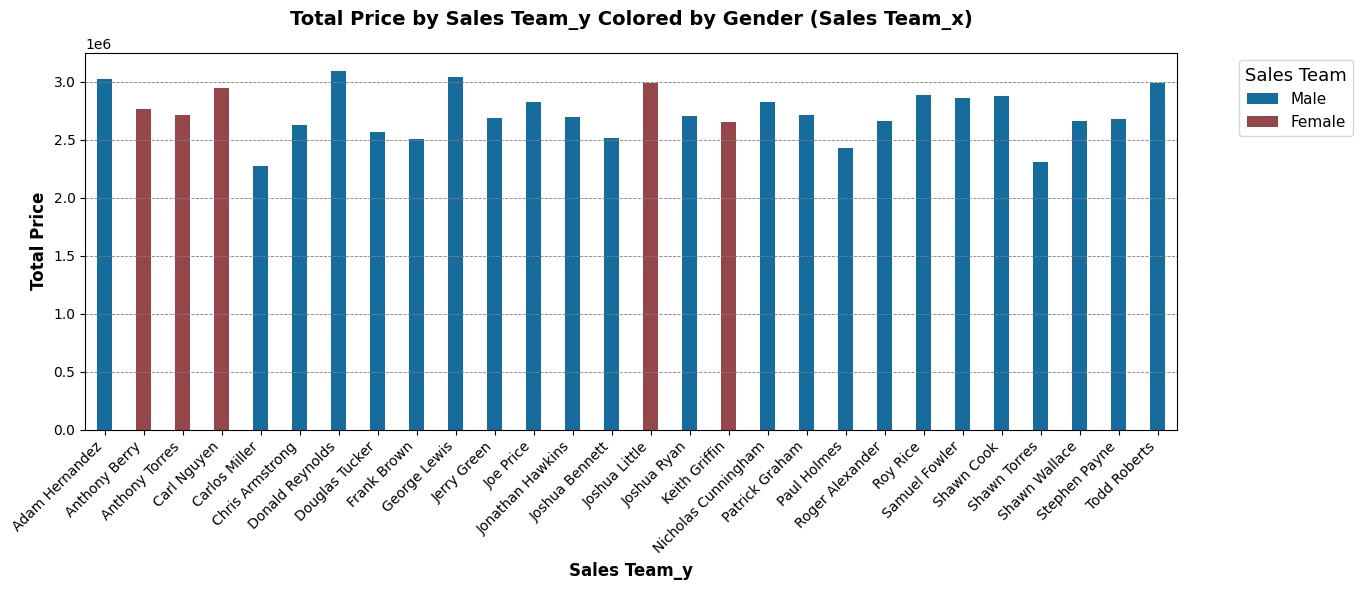

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming temp_df is already defined as before
# Group by 'Sales Team_y' to aggregate Total Price and get the Sales Team_x
x = temp_df.groupby("Sales Team_y").agg({
    "Sales Team_x": "first",
    "Total Price": "sum"
})

# Drop rows where 'Sales Team_x' is NaN
x = x.dropna(subset=["Sales Team_x"])

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=x, x=x.index, y="Total Price", hue="Sales Team_x", palette={"Male": "#0072B5", "Female": "#A2393E"}, width=0.4)

# Adding labels and title
plt.xlabel("Sales Team_y", fontsize=12, fontweight='bold', color='black')
plt.ylabel("Total Price", fontsize=12, fontweight='bold', color='black')
plt.title("Total Price by Sales Team_y Colored by Gender (Sales Team_x)", fontsize=14, fontweight='bold', color='black', pad=20)

# Adding gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.6, color='gray')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')

# Customize the y-axis label format and color
plt.tick_params(axis='y', labelsize=10, colors='black')
plt.tick_params(axis='x', labelsize=10, colors='black')

# Show the plot
plt.tight_layout()
# plt.legend(title='Sales Team', title_fontsize='13', fontsize='11')
plt.legend(title='Sales Team', bbox_to_anchor=(1.05, 1), loc='upper left',  title_fontsize='13', fontsize='11')
plt.show()


In [144]:
temp = x[x["Sales Team_x"]=="Female"][["Region", "Total Price"]]
# temp_df.groupby("Region")[["Sales Team_x"]]count()
temp
# temp.to_excel("Females_Staff_Sales_total.xlsx")

KeyError: "['Region'] not in index"

In [34]:
loc_en_dataset6.to_excel("Joined_Dataset.xlsx")

In [156]:
temp_df = loc_en_dataset6[["Sales Channel", "Delivery Delay", "State_x", "Region_x"]]
temp_df["OrderYear"] = loc_en_dataset6["OrderDate"].dt.year
temp_df

C:\Users\zenda\AppData\Local\Temp\ipykernel_20844\3739722080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["OrderYear"] = loc_en_dataset6["OrderDate"].dt.year


,Sales Channel,Delivery Delay,State_x,Region_x,OrderYear
0,In-Store,19 days,New York,Northeast,2018
1,Online,32 days,Kansas,Midwest,2018
2,Distributor,31 days,Michigan,Midwest,2018
3,Wholesale,7 days,Connecticut,Northeast,2018
4,Distributor,26 days,Connecticut,Northeast,2018
...,...,...,...,...,...
7474,Distributor,14 days,North Carolina,South,2020
7475,In-Store,8 days,North Dakota,Midwest,2020
7476,In-Store,16 days,California,West,2020
7477,In-Store,11 days,District of Columbia,South,2020


In [157]:
northeast_delay = temp_df[temp_df["Region_x"]=="Northeast"]
midwest_delay = temp_df[temp_df["Region_x"]=="Midwest"]
west_delay = temp_df[temp_df["Region_x"]=="West"]
south_delay = temp_df[temp_df["Region_x"]=="South"]

print("Northeast region mean Delay: ", northeast_delay[["Delivery Delay"]].mean())
print("Midwest region mean Delay: ", midwest_delay[["Delivery Delay"]].mean())
print("West region mean Delay: ", west_delay[["Delivery Delay"]].mean())
print("South region mean Delay: ", south_delay[["Delivery Delay"]].mean())

Northeast region mean Delay:  Delivery Delay   20 days 14:35:15.754189944
dtype: timedelta64[ns]
Midwest region mean Delay:  Delivery Delay   20 days 15:54:25.764023210
dtype: timedelta64[ns]
West region mean Delay:  Delivery Delay   20 days 11:28:00
dtype: timedelta64[ns]
South region mean Delay:  Delivery Delay   20 days 21:09:26.075113495
dtype: timedelta64[ns]


In [159]:
print("In-store Delay: ", temp_df[temp_df["Sales Channel"]=="In-Store"]["Delivery Delay"].mean())
print("Online Delay: ", temp_df[temp_df["Sales Channel"]=="Online"]["Delivery Delay"].mean())
print("Wholesale Delay: ", temp_df[temp_df["Sales Channel"]=="Wholesale"]["Delivery Delay"].mean())
print("Distributor Delay: ", temp_df[temp_df["Sales Channel"]=="Distributor"]["Delivery Delay"].mean())

In-store Delay:  20 days 13:15:46.636626971
Online Delay:  20 days 19:32:23.362831858
Wholesale Delay:  20 days 07:21:36
Distributor Delay:  20 days 21:21:07.132867132


In [8]:
online_delay = temp_df[temp_df["Sales Channel"]=="Online"]["Delivery Delay"].mean()
online_delay

Timedelta('20 days 19:32:23.362831858')

In [9]:
wholesaler_delay = temp_df[temp_df["Sales Channel"]=="Wholesale"]["Delivery Delay"].mean()
wholesaler_delay

Timedelta('20 days 07:21:36')

In [10]:
distributer_delay = temp_df[temp_df["Sales Channel"]=="Distributor"]["Delivery Delay"].mean()
distributer_delay

Timedelta('20 days 21:21:07.132867132')

In [11]:
temp_df.groupby("OrderYear")[["Delivery Delay"]].mean()

,Delivery Delay
OrderYear,
2018,20 days 21:00:53.027823240
2019,20 days 11:13:38.884120171
2020,20 days 17:43:37.806648834


If we were to estimate the days in the table above, then in 2018 and 2020, the delivery delay is approximately of 21 days whereas in 2019, the delivery delay is lesser by 1 day approx, i.e., around 20 days. This is in correlation with the yearly sales report and may be contributing to the reason why the sales in 2019 was higher but lower in 2018 and 2020.

The prime reason is customer loyalty, which was yielding profit when the delivery delay is lesser and the delivery is faster.

No variation of Delivery Delay with respect to region and sales channel was observed.

This means that the regions yielding more profit are also having a mean delay of 20-21 days. Reducing this number especially in those regions should help improve customer loyalty.

In [161]:
temp_df = loc_en_dataset6[["Sales Channel", "State_x", "Region_x", "Customer Names", "Total Price", "Discount Applied"]]
temp_df.to_excel("Discount_Region_Customer_totalPrice.xlsx")
temp_df

,Sales Channel,State_x,Region_x,Customer Names,Total Price,Discount Applied
0,In-Store,New York,Northeast,Rochester Ltd,9815.5,0.075
1,Online,Kansas,Midwest,Anonymous,11818.8,0.075
2,Distributor,Michigan,Midwest,"3LAB, Ltd",1775.5,0.050
3,Wholesale,Connecticut,Northeast,"Fenwal, Corp",18599.2,0.075
4,Distributor,Connecticut,Northeast,Bare,14579.2,0.100
...,...,...,...,...,...,...
7474,Distributor,North Carolina,South,Burt's Corp,998.3,0.100
7475,In-Store,North Dakota,Midwest,Avon Corp,11798.7,0.100
7476,In-Store,California,West,Burt's Corp,7396.8,0.150
7477,In-Store,District of Columbia,South,Llorens Ltd,8944.5,0.200


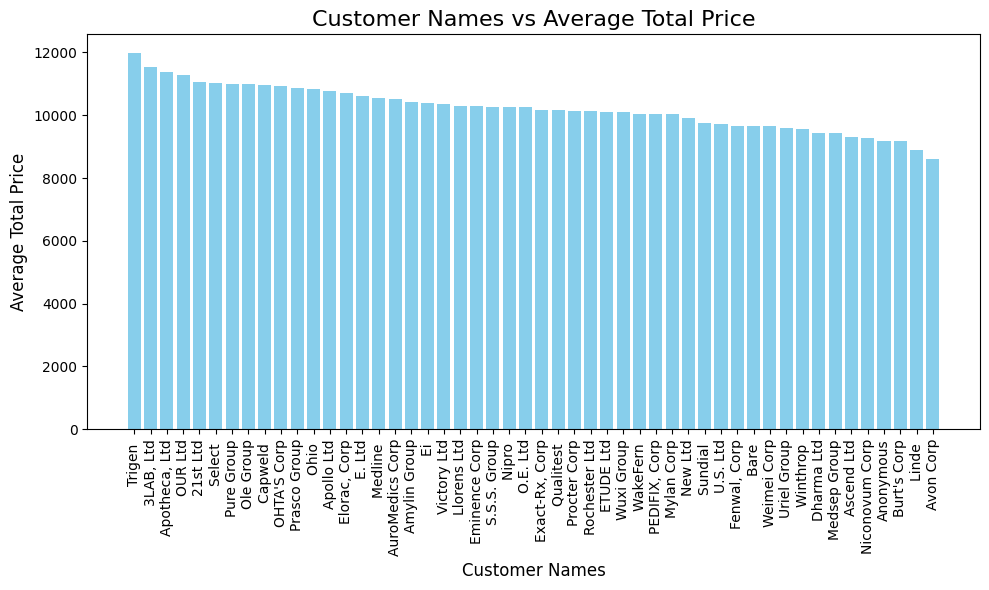

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Customer Names', taking the mean of 'Total Price'
grouped_df = temp_df.groupby("Customer Names")["Total Price"].mean().reset_index()

# Sort the data by total price for better visualization
grouped_df = grouped_df.sort_values(by="Total Price", ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(grouped_df["Customer Names"], grouped_df["Total Price"], color='skyblue')

# Add labels and title
plt.xlabel("Customer Names", fontsize=12)
plt.ylabel("Average Total Price", fontsize=12)
plt.title("Customer Names vs Average Total Price", fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


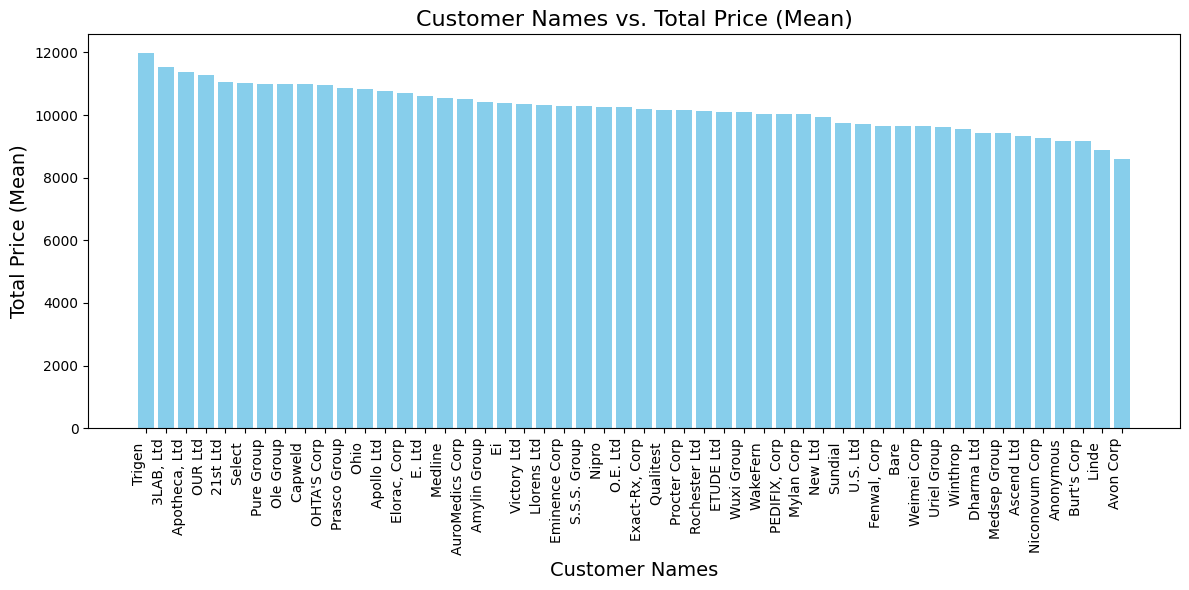

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Customer Names' and calculate the mean of 'Total Price'
grouped_data = temp_df.groupby("Customer Names")["Total Price"].mean().reset_index()

# Sort the grouped data by 'Total Price' in descending order
grouped_data_sorted = grouped_data.sort_values(by="Total Price", ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_sorted["Customer Names"], grouped_data_sorted["Total Price"], color='skyblue')
plt.xlabel("Customer Names", fontsize=14)
plt.ylabel("Total Price (Mean)", fontsize=14)
plt.title("Customer Names vs. Total Price (Mean)", fontsize=16)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\zenda\AppData\Local\Temp\ipykernel_20844\3915281506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Discounted Amount'] = temp_df['Total Price'] * temp_df['Discount Applied']


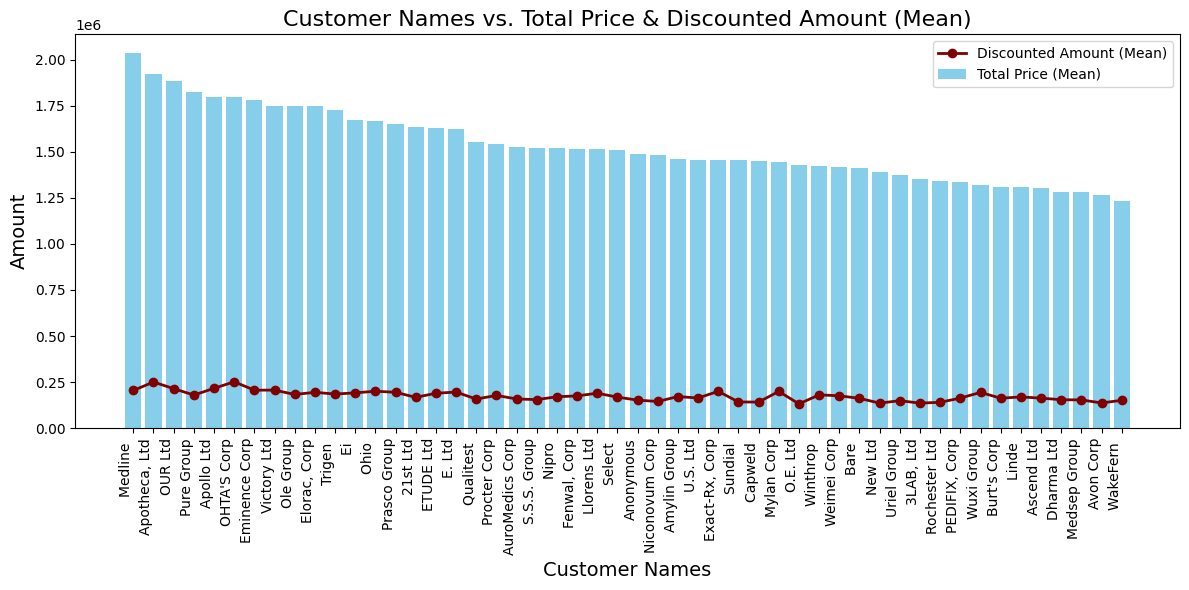

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the discounted amount
temp_df['Discounted Amount'] = temp_df['Total Price'] * temp_df['Discount Applied']

# Group by 'Customer Names' and calculate the mean of 'Total Price' and 'Discounted Amount'
grouped_data = temp_df.groupby("Customer Names").agg({"Total Price": "sum", "Discounted Amount": "sum"}).reset_index()

# Sort the grouped data by 'Total Price' in descending order
grouped_data_sorted = grouped_data.sort_values(by="Total Price", ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))

# Bar plot for Total Price (Mean)
plt.bar(grouped_data_sorted["Customer Names"], grouped_data_sorted["Total Price"], color='skyblue', label='Total Price (Mean)')

# Line plot for Discounted Amount (Mean) in maroon
plt.plot(grouped_data_sorted["Customer Names"], grouped_data_sorted["Discounted Amount"], color='maroon', marker='o', linestyle='-', linewidth=2, label='Discounted Amount (Mean)')

# Adding labels and title
plt.xlabel("Customer Names", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.title("Customer Names vs. Total Price & Discounted Amount (Mean)", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add legend to distinguish between the bar and line plot
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


C:\Users\zenda\AppData\Local\Temp\ipykernel_20844\2505142435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Discounted Amount'] = temp_df['Total Price'] * temp_df['Discount Applied']


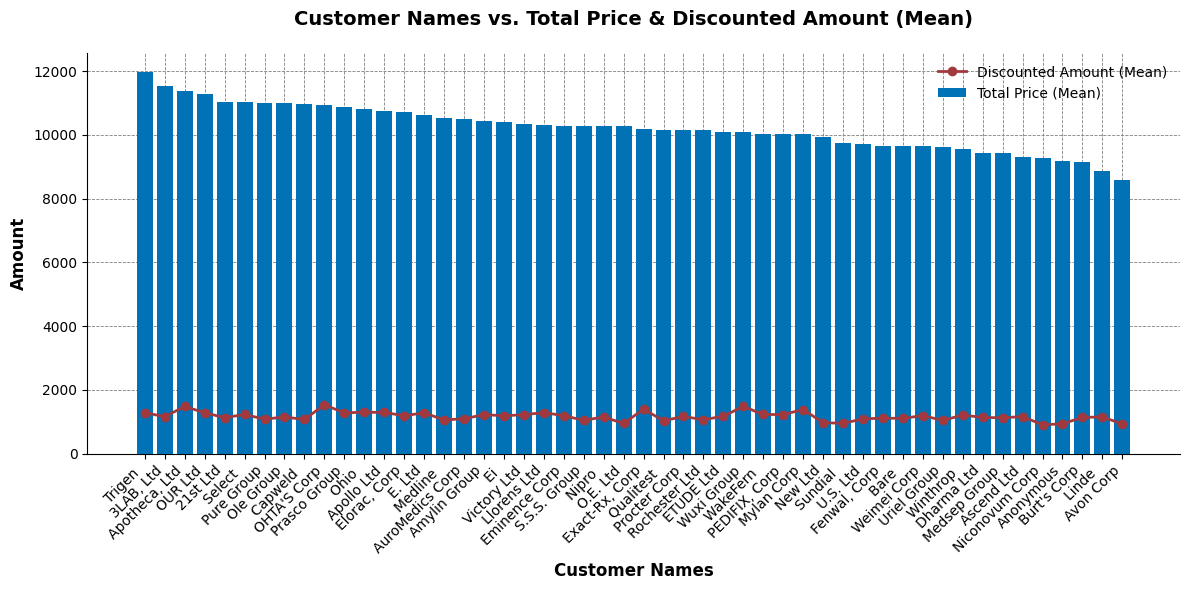

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the discounted amount
temp_df['Discounted Amount'] = temp_df['Total Price'] * temp_df['Discount Applied']

# Group by 'Customer Names' and calculate the mean of 'Total Price' and 'Discounted Amount'
grouped_data = temp_df.groupby("Customer Names").agg({"Total Price": "mean", "Discounted Amount": "mean"}).reset_index()

# Sort the grouped data by 'Total Price' in descending order
grouped_data_sorted = grouped_data.sort_values(by="Total Price", ascending=False)

# Use 'seaborn-white' style and manually set gridlines
# plt.style.use('seaborn-white')

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for Total Price (Mean)
ax.bar(grouped_data_sorted["Customer Names"], grouped_data_sorted["Total Price"], color='#0072B5', label='Total Price (Mean)', zorder=3)

# Line plot for Discounted Amount (Mean) in maroon
ax.plot(grouped_data_sorted["Customer Names"], grouped_data_sorted["Discounted Amount"], color='#A2393E', marker='o', linestyle='-', linewidth=2, label='Discounted Amount (Mean)', zorder=4)

# Adding gridlines with a subtle appearance
ax.grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', zorder=0)

# Setting labels and title with Power BI-like font size
ax.set_xlabel("Customer Names", fontsize=12, fontweight='bold', color='black')
ax.set_ylabel("Amount", fontsize=12, fontweight='bold', color='black')
ax.set_title("Customer Names vs. Total Price & Discounted Amount (Mean)", fontsize=14, fontweight='bold', color='black', pad=20)

# Rotate x-axis labels for better readability (Power BI-like angle)
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')

# Customize the y-axis label format and color
ax.tick_params(axis='y', labelsize=10, colors='black')
ax.tick_params(axis='x', labelsize=10, colors='black')

# Add a legend for distinction
ax.legend(loc='upper right', fontsize=10, frameon=False)

# Remove the top and right spines for a cleaner look (Power BI style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show plot
plt.show()


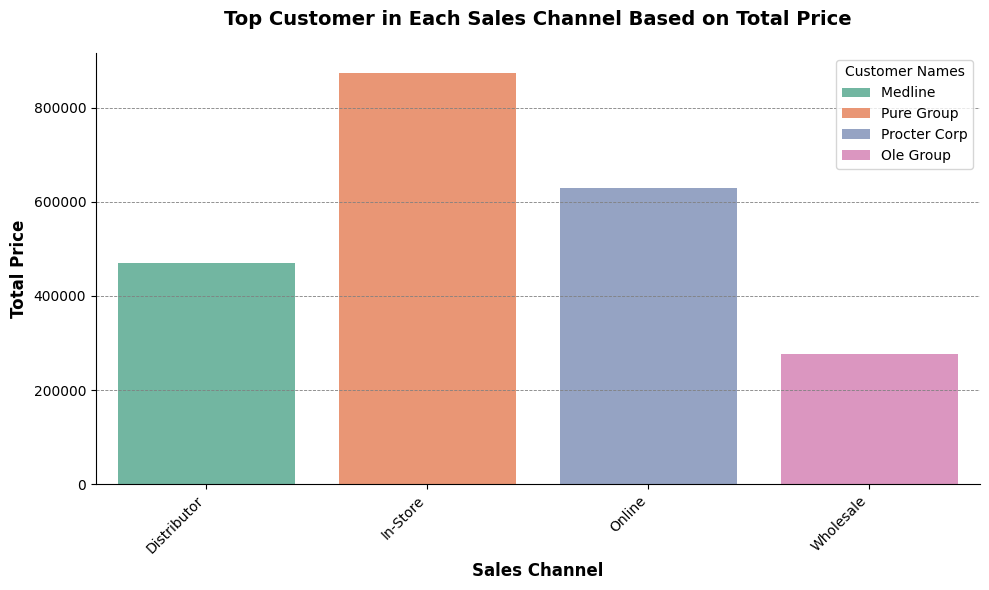

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming temp_df has 'Customer Names', 'Sales Channel', and 'Total Price' columns

# Group by 'Sales Channel' and 'Customer Names' and sum the 'Total Price'
grouped_sales = temp_df.groupby(['Sales Channel', 'Customer Names'])['Total Price'].sum().reset_index()

# Sort the data to get the top customers in each sales channel
top_customers = grouped_sales.sort_values(by=['Sales Channel', 'Total Price'], ascending=[True, False])

# Keep only the top customer per Sales Channel
top_customers_per_channel = top_customers.groupby('Sales Channel').first().reset_index()

# Plotting the data using Seaborn for a cleaner Power BI-style look
plt.figure(figsize=(10, 6))

# Bar plot to visualize total price of top customers per sales channel
sns.barplot(data=top_customers_per_channel, x='Sales Channel', y='Total Price', hue='Customer Names', palette='Set2')

# Add labels and title
plt.xlabel('Sales Channel', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Total Price', fontsize=12, fontweight='bold', color='black')
plt.title('Top Customer in Each Sales Channel Based on Total Price', fontsize=14, fontweight='bold', color='black', pad=20)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.6, color='gray')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


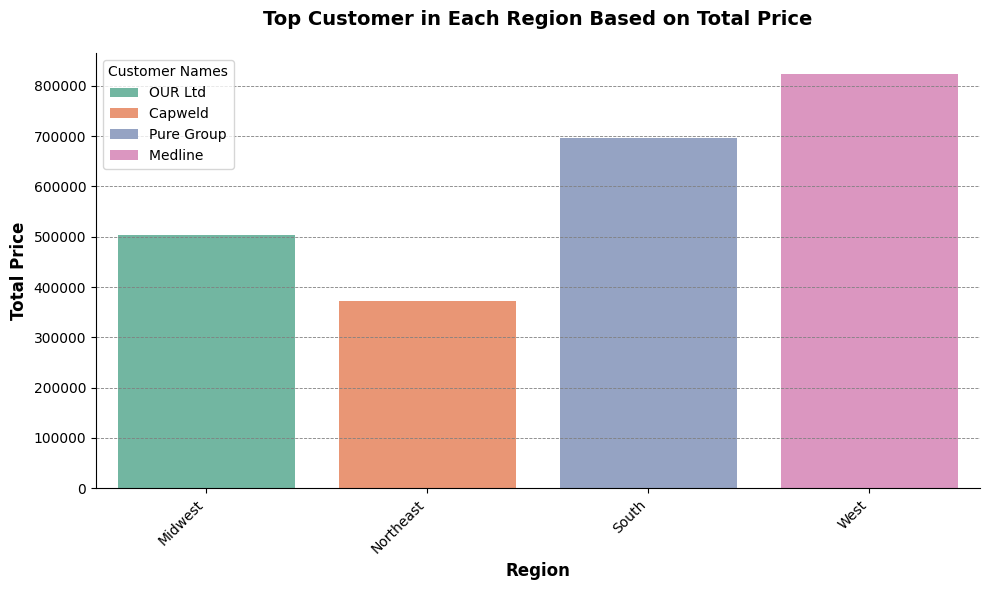

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming temp_df has 'Customer Names', 'Region_x', and 'Total Price' columns

# Group by 'Region_x' and 'Customer Names' and sum the 'Total Price'
grouped_sales_by_region = temp_df.groupby(['Region_x', 'Customer Names'])['Total Price'].sum().reset_index()

# Sort the data to get the top customers in each region
top_customers_by_region = grouped_sales_by_region.sort_values(by=['Region_x', 'Total Price'], ascending=[True, False])

# Keep only the top customer per region
top_customers_per_region = top_customers_by_region.groupby('Region_x').first().reset_index()

# Plotting the data using Seaborn for a cleaner Power BI-style look
plt.figure(figsize=(10, 6))

# Bar plot to visualize total price of top customers per region
sns.barplot(data=top_customers_per_region, x='Region_x', y='Total Price', hue='Customer Names', palette='Set2')

# Add labels and title
plt.xlabel('Region', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Total Price', fontsize=12, fontweight='bold', color='black')
plt.title('Top Customer in Each Region Based on Total Price', fontsize=14, fontweight='bold', color='black', pad=20)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.6, color='gray')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


In [146]:
customer_sales = temp_df.groupby(["Region_x", "Customer Names"]).agg({"Discount Applied": "mean"}).reset_index()
customer_sales["Rank"] = customer_sales.groupby("Region_x")["Discount Applied"].rank(ascending=False, method="dense")
customer_sales = customer_sales.sort_values(by=["Region_x", "Rank"])
customer_sales[customer_sales["Region_x"]=="Midwest"]

,Region_x,Customer Names,Discount Applied,Rank
6,Midwest,Ascend Ltd,0.164516,1.0
49,Midwest,Wuxi Group,0.150000,2.0
24,Midwest,Mylan Corp,0.148864,3.0
43,Midwest,U.S. Ltd,0.143750,4.0
4,Midwest,Apollo Ltd,0.141667,5.0
31,Midwest,Ohio,0.137097,6.0
20,Midwest,Linde,0.131410,7.0
10,Midwest,Burt's Corp,0.127679,8.0
48,Midwest,Winthrop,0.125833,9.0
17,Midwest,Eminence Corp,0.125000,10.0


In [147]:
temp_df

,Sales Channel,State_x,Region_x,Customer Names,Total Price,Discount Applied
0,In-Store,New York,Northeast,Rochester Ltd,9815.5,0.075
1,Online,Kansas,Midwest,Anonymous,11818.8,0.075
2,Distributor,Michigan,Midwest,"3LAB, Ltd",1775.5,0.050
3,Wholesale,Connecticut,Northeast,"Fenwal, Corp",18599.2,0.075
4,Distributor,Connecticut,Northeast,Bare,14579.2,0.100
...,...,...,...,...,...,...
7474,Distributor,North Carolina,South,Burt's Corp,998.3,0.100
7475,In-Store,North Dakota,Midwest,Avon Corp,11798.7,0.100
7476,In-Store,California,West,Burt's Corp,7396.8,0.150
7477,In-Store,District of Columbia,South,Llorens Ltd,8944.5,0.200


In [153]:
customer_sales = temp_df.groupby(["Region_x", "Customer Names"]).agg({"Total Price": "sum"}).reset_index()
customer_sales["Rank"] = customer_sales.groupby("Region_x")["Total Price"].rank(ascending=False, method="dense")
customer_sales = customer_sales.sort_values(by="Rank")
customer_sales[customer_sales["Region_x"]=="Midwest"].plot(kind="bar", )


,Region_x,Customer Names,Total Price,Rank
30,Midwest,OUR Ltd,503565.3,1.0
5,Midwest,"Apotheca, Ltd",497910.5,2.0
7,Midwest,AuroMedics Corp,476477.2,3.0
45,Midwest,Victory Ltd,462949.9,4.0
20,Midwest,Linde,456048.9,5.0
26,Midwest,Niconovum Corp,450179.7,6.0
16,Midwest,"Elorac, Corp",415038.2,7.0
22,Midwest,Medline,404365.1,8.0
15,Midwest,Ei,401825.8,9.0
21,Midwest,Llorens Ltd,396532.8,10.0


In [30]:
customer_sales[customer_sales["Region_x"]=="Northeast"]

,Region_x,Customer Names,Discount Applied,Rank
64,Northeast,ETUDE Ltd,0.189286,1.0
89,Northeast,S.S.S. Group,0.163333,2.0
66,Northeast,"Elorac, Corp",0.155882,3.0
98,Northeast,Winthrop,0.154762,4.0
60,Northeast,Burt's Corp,0.152273,5.0
79,Northeast,OHTA'S Corp,0.152174,6.0
56,Northeast,Ascend Ltd,0.150000,7.0
65,Northeast,Ei,0.142857,8.0
59,Northeast,Bare,0.140789,9.0
57,Northeast,AuroMedics Corp,0.137500,10.0


In [21]:
customer_sales[customer_sales["Region_x"]=="Northeast"]

,Region_x,Customer Names,Total Price,Rank
61,Northeast,Capweld,371816.50,1.0
83,Northeast,"PEDIFIX, Corp",299436.40,2.0
87,Northeast,Qualitest,286498.70,3.0
67,Northeast,Eminence Corp,266338.40,4.0
53,Northeast,Anonymous,258707.10,5.0
78,Northeast,O.E. Ltd,255698.80,6.0
51,Northeast,"3LAB, Ltd",247685.60,7.0
72,Northeast,Medline,245333.90,8.0
55,Northeast,"Apotheca, Ltd",240818.10,9.0
92,Northeast,Trigen,239391.00,10.0


In [134]:
customer_sales[customer_sales["Region_x"]=="West"]

,Region_x,Customer Names,Discount Applied,Rank
160,West,Burt's Corp,0.138208,1.0
179,West,OHTA'S Corp,0.133000,2.0
195,West,Victory Ltd,0.132083,3.0
168,West,"Exact-Rx, Corp",0.131855,4.0
170,West,Linde,0.130000,5.0
154,West,Apollo Ltd,0.129286,6.0
159,West,Bare,0.126020,7.0
165,West,Ei,0.122000,8.0
192,West,Trigen,0.121875,9.0
194,West,Uriel Group,0.120536,10.0


In [136]:
customer_sales[customer_sales["Region_x"]=="South"]

,Region_x,Customer Names,Discount Applied,Rank
112,South,Dharma Ltd,0.153125,1.0
106,South,Ascend Ltd,0.132979,2.0
125,South,New Ltd,0.132738,3.0
124,South,Mylan Corp,0.131383,4.0
118,South,"Exact-Rx, Corp",0.129902,5.0
146,South,WakeFern,0.127344,6.0
129,South,OHTA'S Corp,0.126271,7.0
148,South,Winthrop,0.125556,8.0
116,South,"Elorac, Corp",0.122449,9.0
113,South,E. Ltd,0.122321,10.0


In [60]:
loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Store Code,Order Quantity,Discount Applied,Unit Price,...,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Delivery Delay,Region_x,Sales Team_x
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,5.0,0.075,1963.1,...,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,19 days,Northeast,Male
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,3.0,0.075,3939.6,...,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,32 days,Midwest,Male
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,1.0,0.050,1775.5,...,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,31 days,Midwest,Male
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,8.0,0.075,2324.9,...,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,7 days,Northeast,Male
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,8.0,0.100,1822.4,...,14579.2,Connecticut,108802,40213,40467,Bare,Candles,26 days,Northeast,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,229,1.0,0.100,998.3,...,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,14 days,South,Male
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,238,3.0,0.100,3932.9,...,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,8 days,Midwest,Male
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,58,2.0,0.150,3698.4,...,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,16 days,West,Male
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,113,5.0,0.200,1788.9,...,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,11 days,South,Male


In [75]:
temp_df = loc_en_dataset6[["Store Code", "Sales Team_x", "Total Price"]]
temp_df
x = temp_df.groupby("Store Code").agg({
    "Total Price":"sum",
    "Sales Team_x":"first"
})


,Total Price,Sales Team_x
Store Code,,
1,269299.8,Male
2,203894.4,Male
3,97592.2,Male
4,152639.4,Male
5,110677.3,Male
...,...,...
363,189784.2,Female
364,260000.2,Male
365,129946.5,Male


<Figure size 1200x600 with 0 Axes>

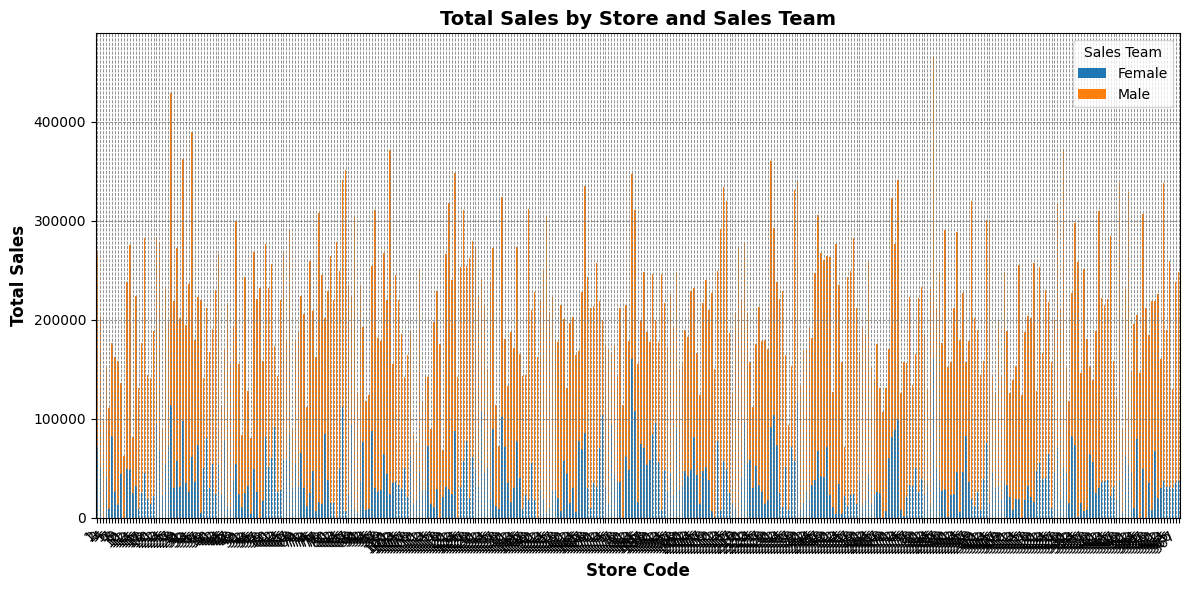

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Store Code' and 'Sales Team_x' and sum 'Total Price'
grouped_data = temp_df.groupby(['Store Code', 'Sales Team_x'])['Total Price'].sum().unstack()

# Plot settings
plt.figure(figsize=(12, 6))

# Create a bar plot, with 'Store Code' on x-axis and 'Total Price' for male and female sales teams
grouped_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(12, 6))

# Set labels and title
plt.xlabel("Store Code", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales", fontsize=12, fontweight='bold')
plt.title("Total Sales by Store and Sales Team", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend for Sales Team_x
plt.legend(title='Sales Team', loc='upper right', fontsize=10)

# Display grid lines
plt.grid(True, which='major', linestyle='--', linewidth=0.6, color='gray')

# Adjust layout to avoid label overlap
plt.tight_layout()

# Show plot
plt.show()
